In [1]:
pwd

u'/home/rahul/python-dev/coursera/Computational-Investing'

In [2]:
ls

downloads/  QSTK-tutorial.ipynb  Tutorial.ipynb


In [3]:
cd downloads/QSTK-0.2.8/

/home/rahul/python-dev/coursera/Computational-Investing/downloads/QSTK-0.2.8


In [4]:
ls

Bin/         ez_setup.py         PKG-INFO        setup.cfg
CHANGES.txt  LICENSE.txt         QSTK/           setup.py
docs/        MacInstallation.sh  QSTK.egg-info/  UbuntuInstallation.sh
Examples/    MANIFEST.in         README.md


In [5]:
cd Examples/Basic/

/home/rahul/python-dev/coursera/Computational-Investing/downloads/QSTK-0.2.8/Examples/Basic


In [6]:
ls

allsyms.csv        numpy-tutorial.py   tutorial2.py*           tutorial4.py
example-data.csv*  pandas-tutorial.py  tutorial3portfolio.csv  tutorial5.py
example-syms.csv   tutorial1.py        tutorial3.py            tutorial8.py


In [1]:
%matplotlib inline

In [2]:
import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

/home/rahul/app_packages/anaconda3/envs/qstkpython2env/lib/python2.7/site-packages/QSTK/qstkutil/qsdateutil.py:36: FutureWarning: TimeSeries is deprecated. Please use Series
  return pd.TimeSeries(index=dates, data=dates)


In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
ls_symbols = ["AAPL", "MSFT", "ORCL", "GOOG", "$SPX", "XOM", "GLD"]
dt_start = dt.datetime(2006, 1, 1)
dt_end = dt.datetime(2006, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt_timeofday)

In [5]:
type(ldt_timestamps[0])

pandas.tslib.Timestamp

In [6]:
c_dataobj = da.DataAccess('Yahoo')
ls_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = c_dataobj.get_data(ldt_timestamps, ls_symbols, ls_keys)

In [7]:
type(ldf_data[0])

pandas.core.frame.DataFrame

In [8]:
ldf_data[0].head()

,AAPL,MSFT,ORCL,GOOG,$SPX,XOM,GLD
2006-01-03 16:00:00,72.38,26.25,12.23,422.52,1248.29,56.42,52.29
2006-01-04 16:00:00,75.13,26.77,12.56,443.90,1268.80,58.60,52.87
2006-01-05 16:00:00,74.83,26.96,12.62,446.00,1273.46,58.57,52.56
2006-01-06 16:00:00,75.25,26.89,12.80,456.87,1273.48,58.76,53.14
2006-01-09 16:00:00,76.73,26.93,13.01,466.41,1285.45,59.80,53.46


In [9]:
ldf_data[1].head()

,AAPL,MSFT,ORCL,GOOG,$SPX,XOM,GLD
2006-01-03 16:00:00,74.75,27.00,12.68,435.67,1270.22,58.47,53.18
2006-01-04 16:00:00,75.98,27.08,12.78,448.96,1275.37,58.84,53.34
2006-01-05 16:00:00,74.90,27.13,12.92,451.55,1276.91,58.82,52.72
2006-01-06 16:00:00,76.70,27.00,13.15,470.50,1286.09,59.56,53.87
2006-01-09 16:00:00,77.20,27.07,13.09,473.40,1290.78,59.87,54.99


In [10]:
len(ldf_data)

6

In [11]:
d_data = dict(zip(ls_keys, ldf_data))

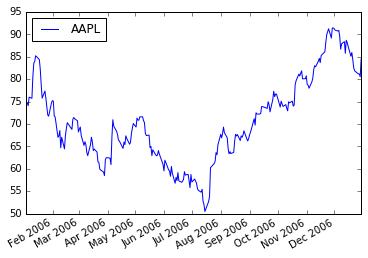

In [12]:
d_data['close'][['AAPL']].plot(kind='line')

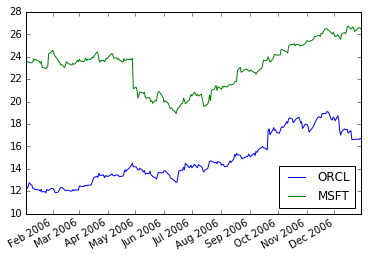

In [13]:
d_data['close'][['ORCL', 'MSFT']].plot(kind='line')

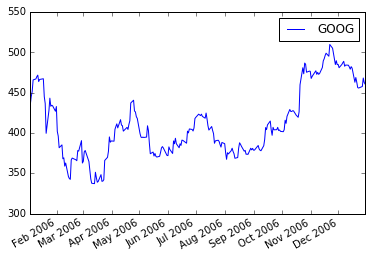

In [14]:
d_data['close'][['GOOG']].plot(kind='line')

In [15]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size

[6.0, 4.0]

In [16]:
g_fig_size = [1.5 * x for x in fig_size]
g_fig_size

[9.0, 6.0]

In [17]:
plt.rcParams["figure.figsize"] = g_fig_size

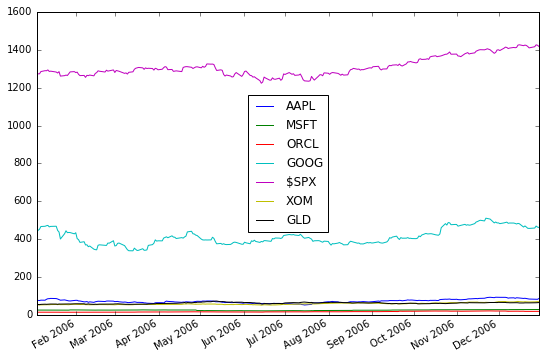

In [18]:
d_data['close'].plot(kind='line')

<h2> Normalized data </h2>

In [19]:
df = d_data['close']
df_normalized = df / df.ix[0]

In [20]:
df_normalized.head()

,AAPL,MSFT,ORCL,GOOG,$SPX,XOM,GLD
2006-01-03 16:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2006-01-04 16:00:00,1.002956,1.004695,1.001634,1.022999,1.003673,1.001783,1.003389
2006-01-05 16:00:00,0.995029,1.005548,1.015523,1.036785,1.003689,0.996830,0.985316
2006-01-06 16:00:00,1.020691,1.002561,1.041667,1.069917,1.013123,1.016445,1.011295
2006-01-09 16:00:00,1.017332,1.000854,1.022059,1.072766,1.016827,1.016049,1.027861


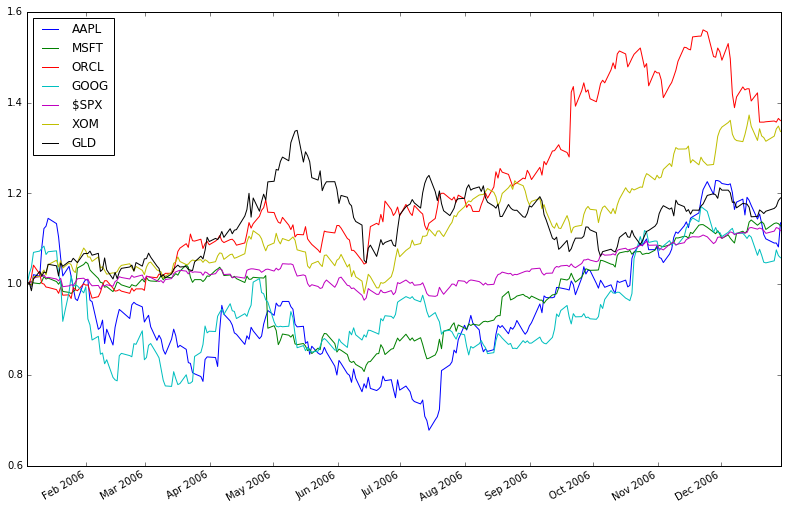

In [21]:
plt.rcParams["figure.figsize"] = [1.5*9.0, 1.5*6]
df_normalized.plot(kind='line')
plt.rcParams["figure.figsize"] = [9.0, 6.0]

<h2> Daily Returns </h2>

In [22]:
plt.rcParams["figure.figsize"] = [1.5*9.0, 1.5*6]
# plt.rcParams["figure.figsize"] = [9.0, 6.0]
dfs = df.shift(1)

In [23]:
daily_return = df.diff()

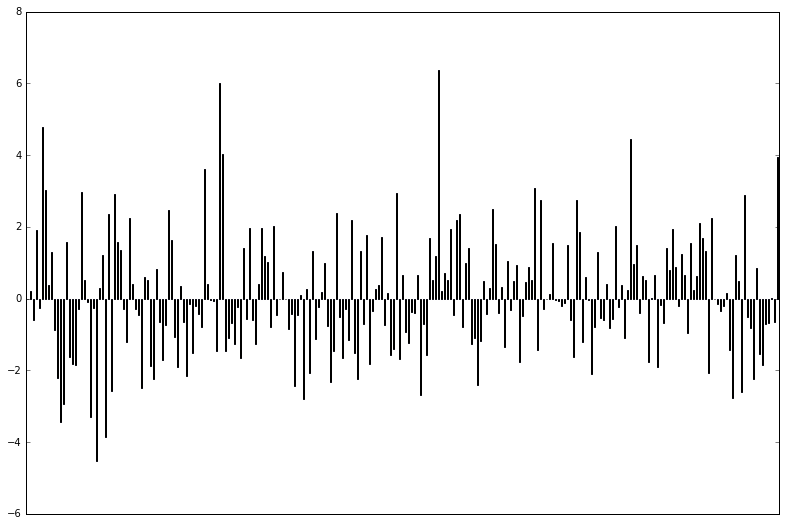

In [24]:
plt.figure()
plt.gca().axes.get_xaxis().set_visible(False)
daily_return['AAPL'].plot(kind='bar')

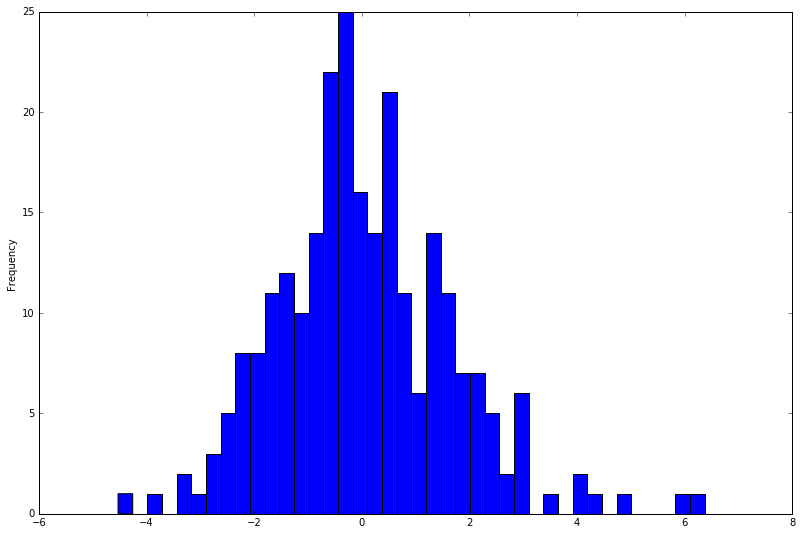

In [25]:
plt.figure()
daily_return['AAPL'].plot(kind='hist', bins=40)

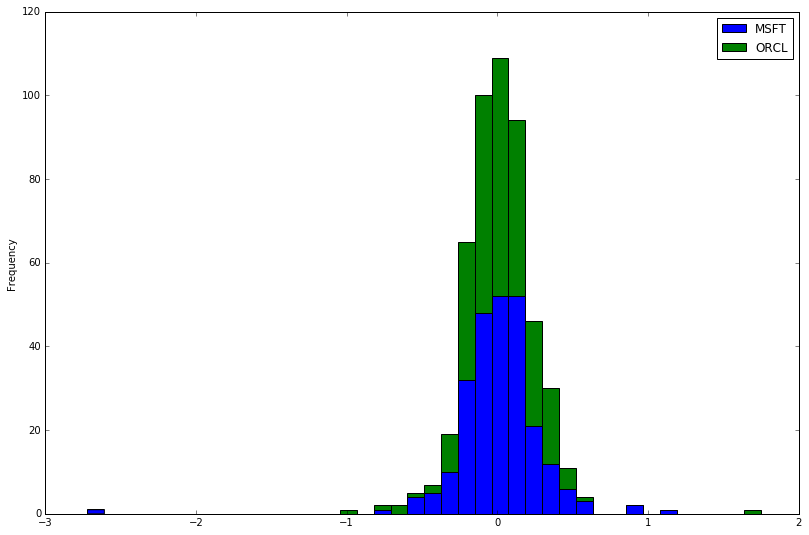

In [26]:
plt.figure()
daily_return[["MSFT", "ORCL"]].plot(kind='hist', bins=40, stacked=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0399916410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f03996ea590>]], dtype=object)

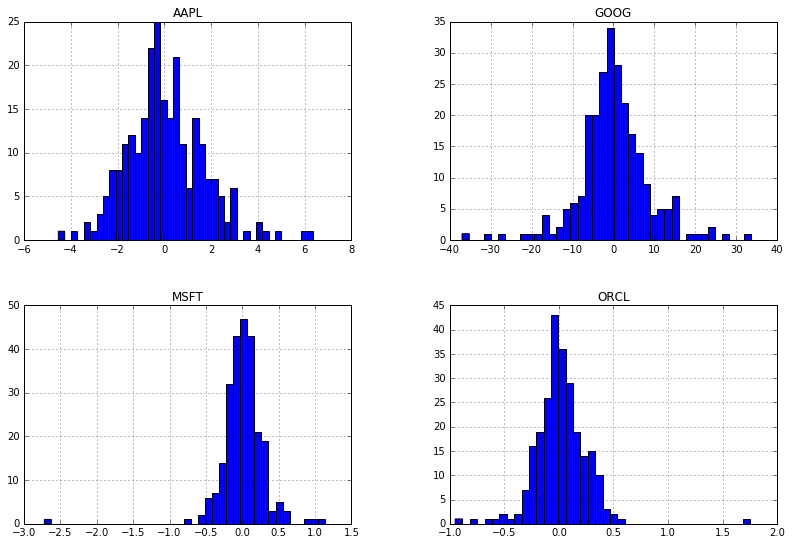

In [27]:
plt.figure()
daily_return[["MSFT", "ORCL", "GOOG", "AAPL"]].hist(bins=40)

<h2> Scatter Plot </h2>
Scatter plots are a convenient way to assess how similarly two equities move together. In a scatter plot of daily returns the X location of each point represents the return on one day for one stock, and the Y location is the return for another stock. If the cloud of points is arranged roughly in a line we can infer that the equities move together.

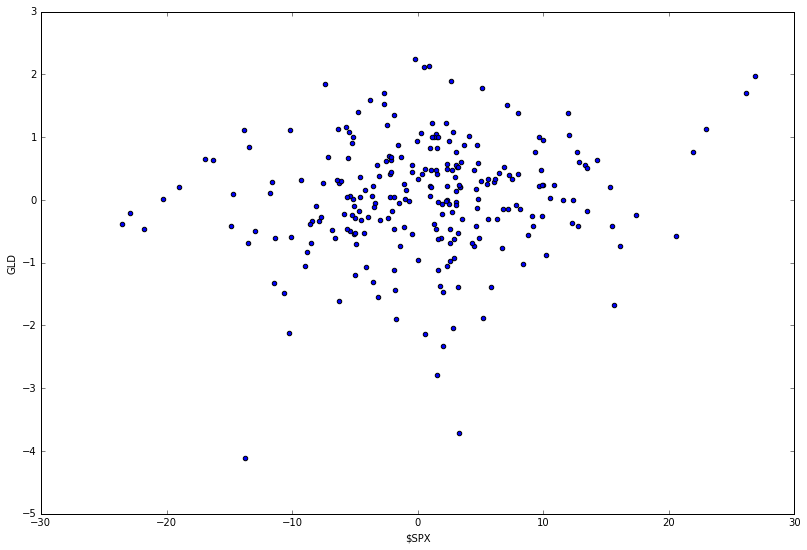

In [28]:
daily_return.plot.scatter(x='$SPX', y='GLD')

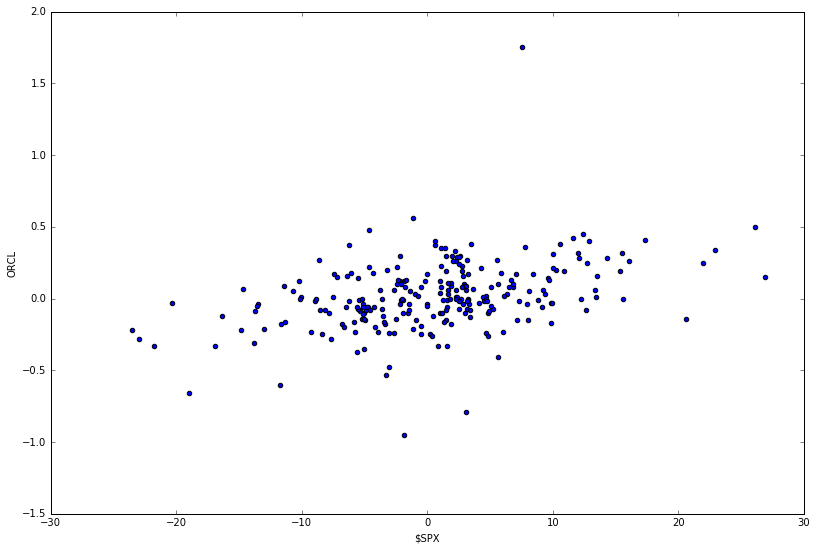

In [29]:
daily_return.plot.scatter(x='$SPX', y='ORCL')

<h3> Cumulative Daily Return </h3><br>
daily_cum_ret(t) = daily_cum_ret(t-1) * (1 + daily_ret(t))

In [30]:
daily_return.head()

,AAPL,MSFT,ORCL,GOOG,$SPX,XOM,GLD
2006-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 16:00:00,0.22,0.11,0.02,10.01,4.66,0.09,0.18
2006-01-05 16:00:00,-0.59,0.02,0.17,6.00,0.02,-0.25,-0.96
2006-01-06 16:00:00,1.91,-0.07,0.32,14.42,11.97,0.99,1.38
2006-01-09 16:00:00,-0.25,-0.04,-0.24,1.24,4.70,-0.02,0.88


In [37]:
daily_cum_returns_list = []
num_days = len(daily_return)
for symbol in daily_return.columns:
    d_return = daily_return[symbol]
    d_cum_return = np.empty(num_days)
    d_cum_return[0] = 0.  # first row is 0
    d_cum_return[1] = d_return[1] / 100.
    for t in range(2, num_days):
        d_cum_return[t] = d_cum_return[t-1] * (1 + d_return[t]/100.0)
    daily_cum_returns_list.append(d_cum_return*100)            

In [38]:
for i in range(len(daily_cum_returns_list)):
    print len(daily_cum_returns_list[i])

251
251
251
251
251
251
251


In [39]:
import collections
daily_cum_return_df = pd.DataFrame(collections.OrderedDict(zip(daily_return.columns, daily_cum_returns_list)), index=daily_return.index)

In [40]:
daily_return.head()

,AAPL,MSFT,ORCL,GOOG,$SPX,XOM,GLD
2006-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 16:00:00,0.22,0.11,0.02,10.01,4.66,0.09,0.18
2006-01-05 16:00:00,-0.59,0.02,0.17,6.00,0.02,-0.25,-0.96
2006-01-06 16:00:00,1.91,-0.07,0.32,14.42,11.97,0.99,1.38
2006-01-09 16:00:00,-0.25,-0.04,-0.24,1.24,4.70,-0.02,0.88


In [47]:
daily_cum_return_df.tail()

,AAPL,MSFT,ORCL,GOOG,$SPX,XOM,GLD
2006-12-22 16:00:00,0.228935,0.112900,0.020876,4.343459,8.255480,0.104806,0.193625
2006-12-26 16:00:00,0.227355,0.113250,0.020880,4.428157,8.762366,0.105403,0.194264
2006-12-27 16:00:00,0.227378,0.113284,0.020874,4.893113,9.633345,0.106246,0.194730
2006-12-28 16:00:00,0.225900,0.113238,0.020895,4.625460,9.430082,0.106586,0.196054
2006-12-29 16:00:00,0.234846,0.113114,0.020882,4.529250,8.823728,0.105936,0.196662


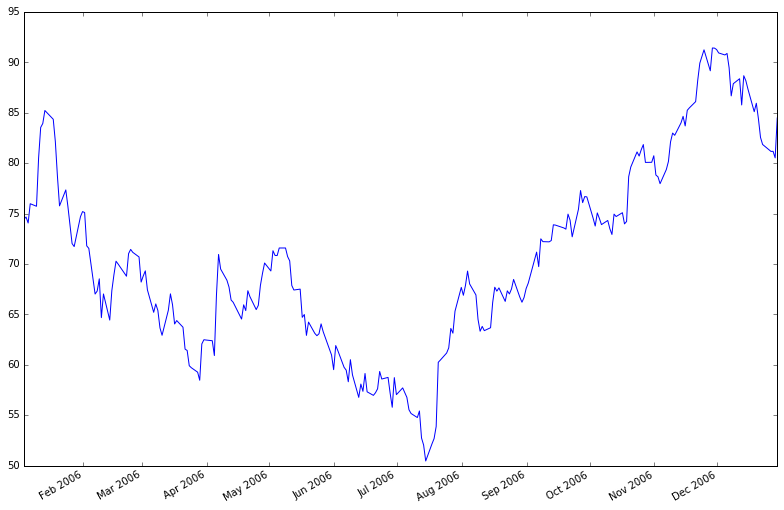

In [42]:
df['AAPL'].plot()

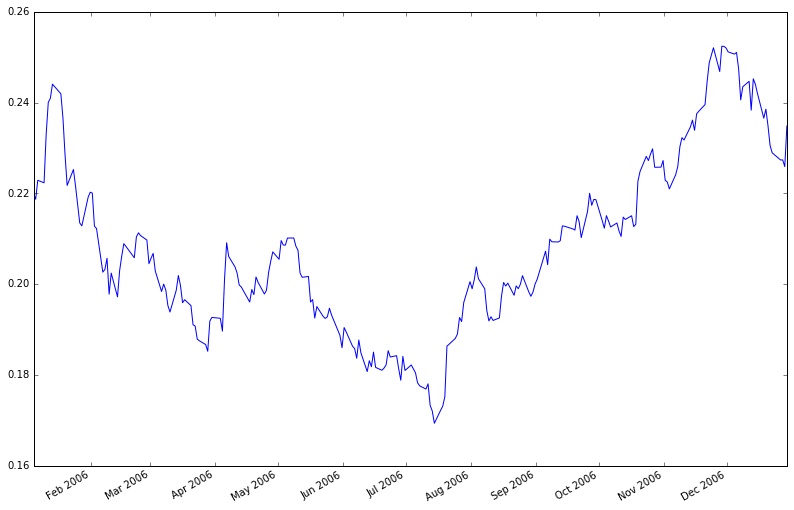

In [46]:
daily_cum_return_df['AAPL'][1:].plot()

In [188]:
ts = df['AAPL']
(ts[-1] - ts[0]) / ts[0]

0.13502619911326072

In [190]:
aapl = pd.DataFrame({ 'price': df['AAPL'], 'daily_ret': daily_return['AAPL'], 'daily_cum_ret': daily_cum_return_df['AAPL']}, index = df.index)

In [191]:
aapl.head(20)

,daily_cum_ret,daily_ret,price
2006-01-03 16:00:00,NaN,NaN,74.43
2006-01-04 16:00:00,NaN,NaN,74.65
2006-01-05 16:00:00,-0.590000,-0.59,74.06
2006-01-06 16:00:00,-0.601269,1.91,75.97
2006-01-09 16:00:00,-0.599766,-0.25,75.72
2006-01-10 16:00:00,-0.628495,4.79,80.51
2006-01-11 16:00:00,-0.647538,3.03,83.54
2006-01-12 16:00:00,-0.650063,0.39,83.93
2006-01-13 16:00:00,-0.658449,1.29,85.22
2006-01-17 16:00:00,-0.652721,-0.87,84.35


In [192]:
daily_return.head()

,AAPL,MSFT,ORCL,GOOG,$SPX,XOM,GLD
2006-01-05 16:00:00,-0.59,0.02,0.17,6.00,0.02,-0.25,-0.96
2006-01-06 16:00:00,1.91,-0.07,0.32,14.42,11.97,0.99,1.38
2006-01-09 16:00:00,-0.25,-0.04,-0.24,1.24,4.70,-0.02,0.88
2006-01-10 16:00:00,4.79,0.12,-0.25,2.86,-0.46,0.39,-0.54
2006-01-11 16:00:00,3.03,0.25,-0.02,1.87,4.49,0.36,0.47
